<a href="https://colab.research.google.com/github/johnneme-alnemeh/American-Sign-Language-ASL-/blob/main/ASL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Making The DataFrames

In [ ]:
import cv2
import pandas as pd
import numpy as np
import mediapipe as mp
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_hands = mp.solutions.hands


dictionary0 = {'letter':[],'x0':[],'y0':[],'z0':[],'x1':[],'y1':[],'z1':[],'x2':[],'y2':[],'z2':[],
              'x3':[],'y3':[],'z3':[],'x4':[],'y4':[],'z4':[],'x5':[],'y5':[],'z5':[],
              'x6':[],'y6':[],'z6':[],'x7':[],'y7':[],'z7':[],'x8':[],'y8':[],'z8':[],
              'x9':[],'y9':[],'z9':[],'x10':[],'y10':[],'z10':[],'x11':[],'y11':[],'z11':[],
              'x12':[],'y12':[],'z12':[],'x13':[],'y13':[],'z13':[],'x14':[],'y14':[],'z14':[],
              'x15':[],'y15':[],'z15':[],'x16':[],'y16':[],'z16':[],'x17':[],'y17':[],'z17':[],
              'x18':[],'y18':[],'z18':[],'x19':[],'y19':[],'z19':[],'x20':[],'y20':[],'z20':[]}

dictionary1 = {'letter':[],'x0':[],'y0':[],'z0':[],'x1':[],'y1':[],'z1':[],'x2':[],'y2':[],'z2':[],
              'x3':[],'y3':[],'z3':[],'x4':[],'y4':[],'z4':[],'x5':[],'y5':[],'z5':[],
              'x6':[],'y6':[],'z6':[],'x7':[],'y7':[],'z7':[],'x8':[],'y8':[],'z8':[],
              'x9':[],'y9':[],'z9':[],'x10':[],'y10':[],'z10':[],'x11':[],'y11':[],'z11':[],
              'x12':[],'y12':[],'z12':[],'x13':[],'y13':[],'z13':[],'x14':[],'y14':[],'z14':[],
              'x15':[],'y15':[],'z15':[],'x16':[],'y16':[],'z16':[],'x17':[],'y17':[],'z17':[],
              'x18':[],'y18':[],'z18':[],'x19':[],'y19':[],'z19':[],'x20':[],'y20':[],'z20':[]}


dictionary2 = {'letter':[],'x0':[],'y0':[],'z0':[],'x1':[],'y1':[],'z1':[],'x2':[],'y2':[],'z2':[],
              'x3':[],'y3':[],'z3':[],'x4':[],'y4':[],'z4':[],'x5':[],'y5':[],'z5':[],
              'x6':[],'y6':[],'z6':[],'x7':[],'y7':[],'z7':[],'x8':[],'y8':[],'z8':[],
              'x9':[],'y9':[],'z9':[],'x10':[],'y10':[],'z10':[],'x11':[],'y11':[],'z11':[],
              'x12':[],'y12':[],'z12':[],'x13':[],'y13':[],'z13':[],'x14':[],'y14':[],'z14':[],
              'x15':[],'y15':[],'z15':[],'x16':[],'y16':[],'z16':[],'x17':[],'y17':[],'z17':[],
              'x18':[],'y18':[],'z18':[],'x19':[],'y19':[],'z19':[],'x20':[],'y20':[],'z20':[]}


dictionary3 = {'letter':[],'x0':[],'y0':[],'z0':[],'x1':[],'y1':[],'z1':[],'x2':[],'y2':[],'z2':[],
              'x3':[],'y3':[],'z3':[],'x4':[],'y4':[],'z4':[],'x5':[],'y5':[],'z5':[],
              'x6':[],'y6':[],'z6':[],'x7':[],'y7':[],'z7':[],'x8':[],'y8':[],'z8':[],
              'x9':[],'y9':[],'z9':[],'x10':[],'y10':[],'z10':[],'x11':[],'y11':[],'z11':[],
              'x12':[],'y12':[],'z12':[],'x13':[],'y13':[],'z13':[],'x14':[],'y14':[],'z14':[],
              'x15':[],'y15':[],'z15':[],'x16':[],'y16':[],'z16':[],'x17':[],'y17':[],'z17':[],
              'x18':[],'y18':[],'z18':[],'x19':[],'y19':[],'z19':[],'x20':[],'y20':[],'z20':[]}


dictionary4 = {'letter':[],'x0':[],'y0':[],'z0':[],'x1':[],'y1':[],'z1':[],'x2':[],'y2':[],'z2':[],
              'x3':[],'y3':[],'z3':[],'x4':[],'y4':[],'z4':[],'x5':[],'y5':[],'z5':[],
              'x6':[],'y6':[],'z6':[],'x7':[],'y7':[],'z7':[],'x8':[],'y8':[],'z8':[],
              'x9':[],'y9':[],'z9':[],'x10':[],'y10':[],'z10':[],'x11':[],'y11':[],'z11':[],
              'x12':[],'y12':[],'z12':[],'x13':[],'y13':[],'z13':[],'x14':[],'y14':[],'z14':[],
              'x15':[],'y15':[],'z15':[],'x16':[],'y16':[],'z16':[],'x17':[],'y17':[],'z17':[],
              'x18':[],'y18':[],'z18':[],'x19':[],'y19':[],'z19':[],'x20':[],'y20':[],'z20':[]}


for n in range(1650,2001):
 # For static images:
  IMAGE_FILES = ['drive/MyDrive/ASL/F/F'+str(n)+'.jpg']
  with mp_hands.Hands(
      static_image_mode=True,
      max_num_hands=2,
      min_detection_confidence=0.5) as hands:
    for idx, file in enumerate(IMAGE_FILES):
      # Read an image, flip it around y-axis for correct handedness output (see
      # above).
      image = cv2.flip(cv2.imread(file), 1)
      # Convert the BGR image to RGB before processing.
      results = hands.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

      # Print handedness and draw hand landmarks on the image.
      if not results.multi_hand_landmarks:
        continue
      for hand_landmarks in results.multi_hand_landmarks:
        d = hand_landmarks.ListFields()
        #take all landmarks
        landmarks = d[0]
        landmarks = landmarks[1]
        dictionary0.get('letter').append(0)
        #take landmark 0
        for i in range(21):
          landmark = landmarks[i]
          landmark = landmark.ListFields()
          #take x
          x = landmark[0]
          x = x[1]
          #take y
          y = landmark[1]
          y = y[1]
          #take z
          z = landmark[2]
          z = z[1]
          dictionary0.get('x'+str(i)).append(x)
          dictionary0.get('y'+str(i)).append(y)
          dictionary0.get('z'+str(i)).append(z)


for n in range(1001,1300):
  # For static images:
  IMAGE_FILES = ['drive/MyDrive/ASL/B/B'+str(n)+'.jpg']
  with mp_hands.Hands(
      static_image_mode=True,
      max_num_hands=2,
      min_detection_confidence=0.5) as hands:
    for idx, file in enumerate(IMAGE_FILES):
      # Read an image, flip it around y-axis for correct handedness output (see
      # above).
      image = cv2.flip(cv2.imread(file), 1)
      # Convert the BGR image to RGB before processing.
      results = hands.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

      # Print handedness and draw hand landmarks on the image.
      if not results.multi_hand_landmarks:
        continue
      for hand_landmarks in results.multi_hand_landmarks:
        d = hand_landmarks.ListFields()
        #take all landmarks
        landmarks = d[0]
        landmarks = landmarks[1]
        dictionary1.get('letter').append(1)
        #take landmark 0
        for i in range(21):
          landmark = landmarks[i]
          landmark = landmark.ListFields()
          #take x
          x = landmark[0]
          x = x[1]
          #take y
          y = landmark[1]
          y = y[1]
          #take z
          z = landmark[2]
          z = z[1]
          dictionary1.get('x'+str(i)).append(x)
          dictionary1.get('y'+str(i)).append(y)
          dictionary1.get('z'+str(i)).append(z)


for n in range(1001,1300):
  # For static images:
  IMAGE_FILES = ['drive/MyDrive/ASL/G/G'+str(n)+'.jpg']
  with mp_hands.Hands(
      static_image_mode=True,
      max_num_hands=2,
      min_detection_confidence=0.5) as hands:
    for idx, file in enumerate(IMAGE_FILES):
      # Read an image, flip it around y-axis for correct handedness output (see
      # above).
      image = cv2.flip(cv2.imread(file), 1)
      # Convert the BGR image to RGB before processing.
      results = hands.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

      # Print handedness and draw hand landmarks on the image.
      if not results.multi_hand_landmarks:
        continue
      for hand_landmarks in results.multi_hand_landmarks:
        d = hand_landmarks.ListFields()
        #take all landmarks
        landmarks = d[0]
        landmarks = landmarks[1]
        dictionary2.get('letter').append(2)
        #take landmark 0
        for i in range(21):
          landmark = landmarks[i]
          landmark = landmark.ListFields()
          #take x
          x = landmark[0]
          x = x[1]
          #take y
          y = landmark[1]
          y = y[1]
          #take z
          z = landmark[2]
          z = z[1]
          dictionary2.get('x'+str(i)).append(x)
          dictionary2.get('y'+str(i)).append(y)
          dictionary2.get('z'+str(i)).append(z)


for n in range(2501,3001):
  # For static images:
  IMAGE_FILES = ['drive/MyDrive/ASL/K/K'+str(n)+'.jpg']
  with mp_hands.Hands(
      static_image_mode=True,
      max_num_hands=2,
      min_detection_confidence=0.5) as hands:
    for idx, file in enumerate(IMAGE_FILES):
      # Read an image, flip it around y-axis for correct handedness output (see
      # above).
      image = cv2.flip(cv2.imread(file), 1)
      # Convert the BGR image to RGB before processing.
      results = hands.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

      # Print handedness and draw hand landmarks on the image.
      if not results.multi_hand_landmarks:
        continue
      for hand_landmarks in results.multi_hand_landmarks:
        d = hand_landmarks.ListFields()
        #take all landmarks
        landmarks = d[0]
        landmarks = landmarks[1]
        dictionary3.get('letter').append(3)
        #take landmark 0
        for i in range(21):
          landmark = landmarks[i]
          landmark = landmark.ListFields()
          #take x
          x = landmark[0]
          x = x[1]
          #take y
          y = landmark[1]
          y = y[1]
          #take z
          z = landmark[2]
          z = z[1]
          dictionary3.get('x'+str(i)).append(x)
          dictionary3.get('y'+str(i)).append(y)
          dictionary3.get('z'+str(i)).append(z)


for n in range(2501,3001):
  # For static images:
  IMAGE_FILES = ['drive/MyDrive/ASL/L/L'+str(n)+'.jpg']
  with mp_hands.Hands(
      static_image_mode=True,
      max_num_hands=2,
      min_detection_confidence=0.5) as hands:
    for idx, file in enumerate(IMAGE_FILES):
      # Read an image, flip it around y-axis for correct handedness output (see
      # above).
      image = cv2.flip(cv2.imread(file), 1)
      # Convert the BGR image to RGB before processing.
      results = hands.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

      # Print handedness and draw hand landmarks on the image.
      if not results.multi_hand_landmarks:
        continue
      for hand_landmarks in results.multi_hand_landmarks:
        d = hand_landmarks.ListFields()
        #take all landmarks
        landmarks = d[0]
        landmarks = landmarks[1]
        dictionary4.get('letter').append(4)
        #take landmark 0
        for i in range(21):
          landmark = landmarks[i]
          landmark = landmark.ListFields()
          #take x
          x = landmark[0]
          x = x[1]
          #take y
          y = landmark[1]
          y = y[1]
          #take z
          z = landmark[2]
          z = z[1]
          dictionary4.get('x'+str(i)).append(x)
          dictionary4.get('y'+str(i)).append(y)
          dictionary4.get('z'+str(i)).append(z)
df0 = pd.DataFrame.from_dict(dictionary0)
df1 = pd.DataFrame.from_dict(dictionary1)
df2 = pd.DataFrame.from_dict(dictionary2)
df3 = pd.DataFrame.from_dict(dictionary3)
df4 = pd.DataFrame.from_dict(dictionary4)

# Basic MediaPipe Code

Handedness: [classification {
  index: 1
  score: 0.9259499907493591
  label: "Right"
}
]
hand_landmarks: landmark {
  x: 0.5213682651519775
  y: 0.8092190027236938
  z: 7.988606967046508e-07
}
landmark {
  x: 0.4042525291442871
  y: 0.7717500925064087
  z: -0.04029921442270279
}
landmark {
  x: 0.3243553638458252
  y: 0.6771625280380249
  z: -0.06132149323821068
}
landmark {
  x: 0.365986168384552
  y: 0.5911617279052734
  z: -0.08077877759933472
}
landmark {
  x: 0.44670170545578003
  y: 0.5518345236778259
  z: -0.10146508365869522
}
landmark {
  x: 0.37356942892074585
  y: 0.5146599411964417
  z: -0.0344804972410202
}
landmark {
  x: 0.3507515490055084
  y: 0.3914380669593811
  z: -0.0701676681637764
}
landmark {
  x: 0.3440679609775543
  y: 0.3104005455970764
  z: -0.10552109032869339
}
landmark {
  x: 0.3399450480937958
  y: 0.24009591341018677
  z: -0.13320766389369965
}
landmark {
  x: 0.44141167402267456
  y: 0.49203675985336304
  z: -0.04340428113937378
}
landmark {
  x: 0.419

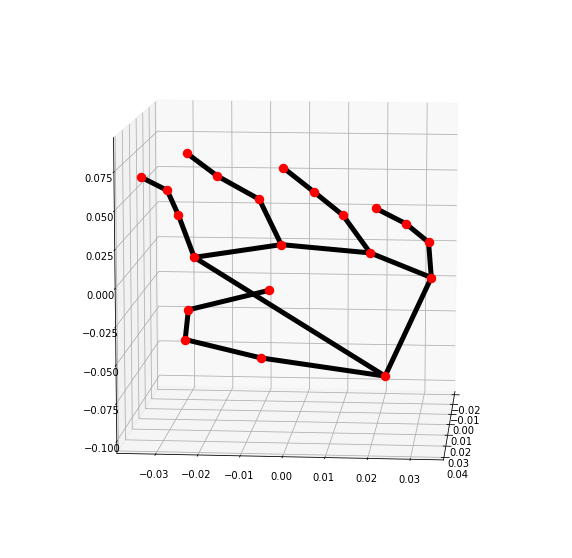

In [ ]:
IMAGE_FILES = ['drive/MyDrive/ASL/B/B1001.jpg']
with mp_hands.Hands(
    static_image_mode=True,
    max_num_hands=2,
    min_detection_confidence=0.5) as hands:
  for idx, file in enumerate(IMAGE_FILES):
    # Read an image, flip it around y-axis for correct handedness output (see
    # above).
    image = cv2.flip(cv2.imread(file), 1)
    # Convert the BGR image to RGB before processing.
    results = hands.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    # Print handedness and draw hand landmarks on the image.
    print('Handedness:', results.multi_handedness)
    if not results.multi_hand_landmarks:
      continue
    image_height, image_width, _ = image.shape
    annotated_image = image.copy()
    for hand_landmarks in results.multi_hand_landmarks:
      print('hand_landmarks:', hand_landmarks)
      print(
          f'Index finger tip coordinates: (',
          f'{hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].x * image_width}, '
          f'{hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].y * image_height})'
      )
      mp_drawing.draw_landmarks(
          annotated_image,
          hand_landmarks,
          mp_hands.HAND_CONNECTIONS,
          mp_drawing_styles.get_default_hand_landmarks_style(),
          mp_drawing_styles.get_default_hand_connections_style())
    cv2.imwrite(
        '/tmp/annotated_image' + str(idx) + '.png', cv2.flip(annotated_image, 1))
    # Draw hand world landmarks.
    if not results.multi_hand_world_landmarks:
      continue
    for hand_world_landmarks in results.multi_hand_world_landmarks:
      mp_drawing.plot_landmarks(
        hand_world_landmarks, mp_hands.HAND_CONNECTIONS, azimuth=5)


# Mergin The DataFrames using pd.DataFrame.append()

# Trasform The DataFrame to CSV file in Drive

In [ ]:
df = df0.append(df1)
df = df.append(df2)
df = df.append(df3)
df = df.append(df4)
df = df.reset_index()
df.to_csv('drive/MyDrive/ASL/hand.csv', index=True)
df = df.drop(columns='index')
df

,letter,x0,y0,z0,x1,y1,z1,x2,y2,z2,...,z17,x18,y18,z18,x19,y19,z19,x20,y20,z20
0,0,0.372680,0.917045,-4.651949e-07,0.303295,0.891149,-0.010283,0.246141,0.840994,-0.027548,...,-0.056731,0.491476,0.636450,-0.082600,0.484481,0.593056,-0.102461,0.460192,0.562599,-0.115687
1,0,0.361637,0.940153,-6.839179e-07,0.295199,0.900890,-0.004785,0.234734,0.835119,-0.015235,...,-0.047680,0.505555,0.637446,-0.074090,0.495468,0.589717,-0.092294,0.461736,0.556004,-0.103005
2,0,0.363086,0.923773,-4.822703e-07,0.293850,0.891062,-0.015608,0.233815,0.829748,-0.031742,...,-0.044709,0.506533,0.642139,-0.071897,0.499997,0.595512,-0.091210,0.471904,0.560087,-0.103324
3,0,0.345296,0.938061,-6.218066e-07,0.274692,0.888219,-0.012400,0.216292,0.823687,-0.026255,...,-0.044776,0.505978,0.638489,-0.073962,0.498104,0.587455,-0.092338,0.463505,0.553714,-0.102815
4,0,0.334734,0.922900,-5.745359e-07,0.264145,0.877493,-0.019889,0.205375,0.815141,-0.036969,...,-0.043569,0.495894,0.638173,-0.075064,0.489878,0.588745,-0.093056,0.460062,0.553872,-0.102316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1415,4,0.355118,0.451880,5.447235e-08,0.261871,0.436452,-0.034777,0.180798,0.409614,-0.056118,...,-0.031476,0.361006,0.246976,-0.064378,0.355420,0.299353,-0.049577,0.358528,0.336170,-0.028399
1416,4,0.357565,0.459701,4.715755e-08,0.269285,0.447529,-0.037636,0.184926,0.417791,-0.060157,...,-0.034727,0.363275,0.255233,-0.069191,0.360940,0.306075,-0.056357,0.365983,0.342201,-0.036630
1417,4,0.362886,0.471697,1.524237e-08,0.269344,0.454894,-0.034642,0.188014,0.426335,-0.055672,...,-0.028622,0.370076,0.264972,-0.060134,0.363844,0.316327,-0.046452,0.366233,0.352709,-0.026940
1418,4,0.375297,0.485072,-1.596922e-08,0.272324,0.464587,-0.029063,0.191533,0.438240,-0.047617,...,-0.021950,0.376372,0.276425,-0.047270,0.369699,0.330442,-0.029503,0.371931,0.366022,-0.008727


# Get X from the DataFrame

In [ ]:
x = ['x0','y0','z0','x1','y1','z1','x2','y2','z2',
   'x3','y3','z3','x4','y4','z4','x5','y5','z5',
   'x6','y6','z6','x7','y7','z7','x8','y8','z8',
   'x9','y9','z9','x10','y10','z10','x11','y11','z11',
   'x12','y12','z12','x13','y13','z13','x14','y14','z14',
   'x15','y15','z15','x16','y16','z16','x17','y17','z17',
   'x18','y18','z18','x19','y19','z19','x20','y20','z20']
X = df[x]
X

,x0,y0,z0,x1,y1,z1,x2,y2,z2,x3,...,z17,x18,y18,z18,x19,y19,z19,x20,y20,z20
0,0.372680,0.917045,-4.651949e-07,0.303295,0.891149,-0.010283,0.246141,0.840994,-0.027548,0.196180,...,-0.056731,0.491476,0.636450,-0.082600,0.484481,0.593056,-0.102461,0.460192,0.562599,-0.115687
1,0.361637,0.940153,-6.839179e-07,0.295199,0.900890,-0.004785,0.234734,0.835119,-0.015235,0.184737,...,-0.047680,0.505555,0.637446,-0.074090,0.495468,0.589717,-0.092294,0.461736,0.556004,-0.103005
2,0.363086,0.923773,-4.822703e-07,0.293850,0.891062,-0.015608,0.233815,0.829748,-0.031742,0.184299,...,-0.044709,0.506533,0.642139,-0.071897,0.499997,0.595512,-0.091210,0.471904,0.560087,-0.103324
3,0.345296,0.938061,-6.218066e-07,0.274692,0.888219,-0.012400,0.216292,0.823687,-0.026255,0.168282,...,-0.044776,0.505978,0.638489,-0.073962,0.498104,0.587455,-0.092338,0.463505,0.553714,-0.102815
4,0.334734,0.922900,-5.745359e-07,0.264145,0.877493,-0.019889,0.205375,0.815141,-0.036969,0.158009,...,-0.043569,0.495894,0.638173,-0.075064,0.489878,0.588745,-0.093056,0.460062,0.553872,-0.102316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1415,0.355118,0.451880,5.447235e-08,0.261871,0.436452,-0.034777,0.180798,0.409614,-0.056118,0.109564,...,-0.031476,0.361006,0.246976,-0.064378,0.355420,0.299353,-0.049577,0.358528,0.336170,-0.028399
1416,0.357565,0.459701,4.715755e-08,0.269285,0.447529,-0.037636,0.184926,0.417791,-0.060157,0.113381,...,-0.034727,0.363275,0.255233,-0.069191,0.360940,0.306075,-0.056357,0.365983,0.342201,-0.036630
1417,0.362886,0.471697,1.524237e-08,0.269344,0.454894,-0.034642,0.188014,0.426335,-0.055672,0.116646,...,-0.028622,0.370076,0.264972,-0.060134,0.363844,0.316327,-0.046452,0.366233,0.352709,-0.026940
1418,0.375297,0.485072,-1.596922e-08,0.272324,0.464587,-0.029063,0.191533,0.438240,-0.047617,0.120029,...,-0.021950,0.376372,0.276425,-0.047270,0.369699,0.330442,-0.029503,0.371931,0.366022,-0.008727


# Get y from the DataFrame

In [ ]:
y = df['letter']
y

0       0
1       0
2       0
3       0
4       0
       ..
1415    4
1416    4
1417    4
1418    4
1419    4
Name: letter, Length: 1420, dtype: int64

# Split the data to X_train X_test y_train y_test

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Apply The SVM Method of classification

In [ ]:
import seaborn as sns
from sklearn.svm import SVC

clf = SVC(kernel = 'rbf', C=0.1).fit(X_train, y_train)
train = clf.score(X_train, y_train)
test = clf.score(X_test, y_test)
print(train, test)

0.9920774647887324 0.9859154929577465


In [ ]:
clf = SVC(kernel = 'rbf', gamma=100).fit(X_train, y_train)
train = clf.score(X_train, y_train)
test = clf.score(X_test, y_test)
print(train, test)

1.0 0.9823943661971831


In [ ]:
clf = SVC(kernel = 'rbf', gamma = 25,C = 0.1).fit(X_train, y_train)
train = clf.score(X_train, y_train)
test = clf.score(X_test, y_test)
print(train, test)

0.9286971830985915 0.9119718309859155


In [ ]:
from sklearn.metrics import confusion_matrix


svm = SVC(kernel='rbf', C=0.1).fit(X_train, y_train)
svm_predicted = svm.predict(X_test)
confusion = confusion_matrix(y_test, svm_predicted)

print('Support vector machine classifier (rbf kernel, C=0.1)\n', confusion)

Support vector machine classifier (rbf kernel, C=1)
 [[75  0  0  0  0]
 [ 4 50  0  0  0]
 [ 0  0 59  0  0]
 [ 0  0  0 53  0]
 [ 0  0  0  0 43]]


In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression().fit(X_train, y_train)
lr_predicted = lr.predict(X_test)
confusion = confusion_matrix(y_test, lr_predicted)

print('Logistic regression classifier (default settings)\n', confusion)

Logistic regression classifier (default settings)
 [[75  0  0  0  0]
 [ 0 54  0  0  0]
 [ 0  0 59  0  0]
 [ 0  0  0 53  0]
 [ 0  0  0  0 43]]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=5).fit(X_train, y_train)
tree_predicted = dt.predict(X_test)
confusion = confusion_matrix(y_test, tree_predicted)

print('Decision tree classifier (max_depth = 2)\n', confusion)

Decision tree classifier (max_depth = 2)
 [[74  0  1  0  0]
 [ 0 54  0  0  0]
 [ 0  0 59  0  0]
 [ 0  3  0 50  0]
 [ 0  0  0  0 43]]


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Accuracy = TP + TN / (TP + TN + FP + FN)
# Precision = TP / (TP + FP)
# Recall = TP / (TP + FN)  Also known as sensitivity, or True Positive Rate
# F1 = 2 * Precision * Recall / (Precision + Recall)
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, tree_predicted)))
print('Precision: {:.2f}'.format(precision_score(y_test, tree_predicted, pos_label='letter', average='macro')))
print('Recall: {:.2f}'.format(recall_score(y_test, tree_predicted, average='macro')))
print('F1: {:.2f}'.format(f1_score(y_test, tree_predicted, average='macro')))
print('Precision: {:.2f}'.format(precision_score(y_test, tree_predicted, pos_label='letter', average='micro')))
print('Recall: {:.2f}'.format(recall_score(y_test, tree_predicted, average='micro')))
print('F1: {:.2f}'.format(f1_score(y_test, tree_predicted, average='micro')))

Accuracy: 0.99
Precision: 0.99
Recall: 0.99
F1: 0.99
Precision: 0.99
Recall: 0.99
F1: 0.99


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1370: UserWarning: Note that pos_label (set to 'letter') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1370: UserWarning: Note that pos_label (set to 'letter') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, tree_predicted, target_names=['F', 'B', 'G', 'K', 'L']))

              precision    recall  f1-score   support

           F       1.00      0.99      0.99        75
           B       0.95      1.00      0.97        54
           G       0.98      1.00      0.99        59
           K       1.00      0.94      0.97        53
           L       1.00      1.00      1.00        43

    accuracy                           0.99       284
   macro avg       0.99      0.99      0.99       284
weighted avg       0.99      0.99      0.99       284



In [ ]:
print('SVM\n',
      classification_report(y_test, svm_predicted, target_names = ['F', 'B', 'G', 'K', 'L']))
print('Logistic regression\n',
      classification_report(y_test, lr_predicted, target_names = ['F', 'B', 'G', 'K', 'L']))
print('Decision tree\n',
      classification_report(y_test, tree_predicted, target_names = ['F', 'B', 'G', 'K', 'L']))

SVM
               precision    recall  f1-score   support

           F       0.95      1.00      0.97        75
           B       1.00      0.93      0.96        54
           G       1.00      1.00      1.00        59
           K       1.00      1.00      1.00        53
           L       1.00      1.00      1.00        43

    accuracy                           0.99       284
   macro avg       0.99      0.99      0.99       284
weighted avg       0.99      0.99      0.99       284

Logistic regression
               precision    recall  f1-score   support

           F       1.00      1.00      1.00        75
           B       1.00      1.00      1.00        54
           G       1.00      1.00      1.00        59
           K       1.00      1.00      1.00        53
           L       1.00      1.00      1.00        43

    accuracy                           1.00       284
   macro avg       1.00      1.00      1.00       284
weighted avg       1.00      1.00      1.00       2

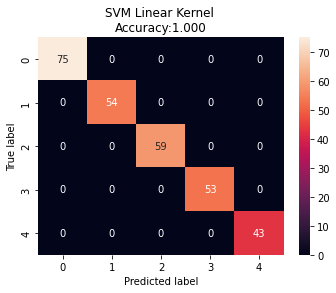

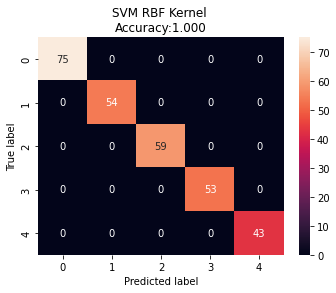

In [ ]:
import matplotlib.pyplot as plt

svm = SVC(kernel = 'linear').fit(X_train, y_train)
svm_predicted = svm.predict(X_test)
confusion = confusion_matrix(y_test, svm_predicted)
df_cm = pd.DataFrame(confusion,
                     index = [i for i in range(0,5)], columns = [i for i in range(0,5)])

plt.figure(figsize=(5.5,4))
sns.heatmap(df_cm, annot=True)
plt.title('SVM Linear Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_test,
                                                                       svm_predicted)))
plt.ylabel('True label')
plt.xlabel('Predicted label')


svm = SVC(kernel = 'rbf').fit(X_train, y_train)
svm_predicted = svm.predict(X_test)
confusion = confusion_matrix(y_test, svm_predicted)
df_cm = pd.DataFrame(confusion, index = [i for i in range(0,5)],
                  columns = [i for i in range(0,5)])

plt.figure(figsize = (5.5,4))
sns.heatmap(df_cm, annot=True)
plt.title('SVM RBF Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_test,
                                                                    svm_predicted)))
plt.ylabel('True label')
plt.xlabel('Predicted label');

In [ ]:
print(classification_report(y_test, svm_predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        75
           1       1.00      1.00      1.00        54
           2       1.00      1.00      1.00        59
           3       1.00      1.00      1.00        53
           4       1.00      1.00      1.00        43

    accuracy                           1.00       284
   macro avg       1.00      1.00      1.00       284
weighted avg       1.00      1.00      1.00       284



In [ ]:
print('Micro-averaged precision = {:.2f} (treat instances equally)'
      .format(precision_score(y_test, svm_predicted, average = 'micro')))
print('Macro-averaged precision = {:.2f} (treat classes equally)'
      .format(precision_score(y_test, svm_predicted, average = 'macro')))

Micro-averaged precision = 1.00 (treat instances equally)
Macro-averaged precision = 1.00 (treat classes equally)


In [ ]:
print('Micro-averaged f1 = {:.2f} (treat instances equally)'
      .format(f1_score(y_test, svm_predicted, average = 'micro')))
print('Macro-averaged f1 = {:.2f} (treat classes equally)'
      .format(f1_score(y_test, svm_predicted, average = 'macro')))

Micro-averaged f1 = 1.00 (treat instances equally)
Macro-averaged f1 = 1.00 (treat classes equally)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
clf = RandomForestClassifier(n_estimators=25, max_depth=3, random_state=0)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9612676056338029

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=100)
neigh.fit(X_train, y_train)
print(neigh.score(X_test, y_test))

0.9014084507042254


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=25, learning_rate=0.1, max_depth=5, random_state=0).fit(X_train, y_train)
clf.score(X_test, y_test)

0.9964788732394366

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=100, learning_rate=0.25, random_state=0)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9753521126760564

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(alpha=9, max_iter=1000)
mlp.fit(X_train, y_train)
mlp.score(X_test, y_test)

0.9894366197183099

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
nb.score(X_test, y_test)

0.8908450704225352

In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda = QuadraticDiscriminantAnalysis(reg_param=0.1)
qda.fit(X_train, y_train)
qda.score(X_test, y_test)

/usr/local/lib/python3.8/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


0.9964788732394366